In [0]:
pip install ndlib

     |████████████████████████████████| 81kB 2.2MB/s 
     |████████████████████████████████| 3.2MB 8.7MB/s 


In [0]:
import math
import csv
import random as rand
import sys
import numpy as np
import pandas as pd
import itertools
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
import collections
import scipy
import operator
from functools import reduce
#import community as cmt
from networkx.algorithms.community import greedy_modularity_communities
#import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM
import random
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
routes = pd.read_csv('routes_clean.csv', low_memory=False)
airports = pd.read_csv('airports_clean.csv', index_col=0)
routes1 = pd.read_csv('routes1.csv', low_memory=False)

routes.head(10)

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment,Source latitude,Source longitude,Destination latitude,Destination longitude,Distance
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,43.449902,39.956600,55.606201,49.278702,1507.989717
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,46.283298,48.006302,55.606201,49.278702,1040.943207
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,46.283298,48.006302,44.225101,43.081902,449.036664
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,55.305801,61.503300,55.606201,49.278702,773.126239
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,55.305801,61.503300,55.012600,82.650703,1343.161122
5,2B,410,DME,4029,KZN,2990,NaN,0,CR2,55.408798,37.906300,55.606201,49.278702,718.084202
6,2B,410,DME,4029,NBC,6969,NaN,0,CR2,55.408798,37.906300,55.564701,52.092499,895.419005
7,2B,410,DME,4029,UUA,6160,NaN,0,CR2,55.408798,37.906300,54.639999,52.801701,954.628750
8,2B,410,EGO,6156,KGD,2952,NaN,0,CR2,50.643799,36.590099,54.889999,20.592600,1175.219692
9,2B,410,EGO,6156,KZN,2990,NaN,0,CR2,50.643799,36.590099,55.606201,49.278702,1010.815885


In [0]:
airports.loc['ORD']

Airport ID                                    3830
Name          Chicago O'Hare International Airport
City                                       Chicago
Country                              United States
ICAO                                          KORD
Latitude                                   41.9786
Longitude                                 -87.9048
Altitude                                       672
Timezone                                        -6
DST                                              A
TZ                                 America/Chicago
Type                                       airport
Source                                 OurAirports
Name: ORD, dtype: object

In [0]:
#Create grraph from edge table of the dataset
G = nx.from_pandas_edgelist(routes1, 'Source', 'Target')
#, create_using=nx.DiGraph()
#Create random graph

ranG1 = nx.gnp_random_graph(3425,0.0033, directed = True)
ranG2 = nx.gnp_random_graph(3425,0.0033)
ranG3 = nx.gnp_random_graph(3425,0.0033)

#nx.draw(ranG, node_size=30)
print("Largest number of nodes random graph",ranG1.number_of_nodes())
print("Number of edges for random graph",ranG1.number_of_edges())
print("Clustering Coefficient random graph: %f "%nx.average_clustering(ranG1))
print("Average Degree random graph : %f" %np.mean([ranG1.degree(n) for n in ranG1.nodes()]))
print("")

Largest number of nodes random graph 3425
Number of edges for random graph 38600
Clustering Coefficient random graph: 0.003244 
Average Degree random graph : 22.540146



Largest number of nodes random graph 3425
Number of edges for random graph 38661
Clustering Coefficient random graph: 0.003298 
Average Degree random graph : 22.575766

Largest connected component


In [0]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
print(len(Gcc))
G0 = G.subgraph(Gcc[0]).copy()
print(nx.number_connected_components(G0))
print("Largest number of nodes for dataset",G.number_of_nodes())
print("Number of edges for dataset",G.number_of_edges())
print("Clustering Coefficient dataset LC: %f "%nx.average_clustering(G))
print("Average Degree Dataset LC : %f" %np.mean([G.degree(n) for n in G.nodes()]))
print()
print("Largest number of nodes in the largest component",G0.number_of_nodes())
print("Number of edges for largest component",G0.number_of_edges())
print("Clustering Coefficient dataset LC: %f "%nx.average_clustering(G0))
print("Average Degree Dataset LC : %f" %np.mean([G0.degree(n) for n in G0.nodes()]))
print("")
print("Largest number of nodes random graph",ranG1.number_of_nodes())
print("Number of edges for random graph",ranG1.number_of_edges())
print("Clustering Coefficient random graph: %f "%nx.average_clustering(ranG1))
print("Average Degree random graph : %f" %np.mean([ranG1.degree(n) for n in ranG1.nodes()]))
print("")
print("Largest number of nodes random graph2",ranG2.number_of_nodes())
print("Number of edges for random graph2",ranG2.number_of_edges())
print("Clustering Coefficient random graph: %f "%nx.average_clustering(ranG2))
print("Average Degree random graph : %f" %np.mean([ranG2.degree(n) for n in ranG2.nodes()]))
print("")
print("Largest number of nodes random graph3",ranG3.number_of_nodes())
print("Number of edges for random graph3",ranG3.number_of_edges())
print("Clustering Coefficient random graph: %f "%nx.average_clustering(ranG3))
print("Average Degree random graph : %f" %np.mean([ranG3.degree(n) for n in ranG3.nodes()]))
print("")

NetworkXNotImplemented: ignored

{'FRA': 0.06950934579439252, 'CDG': 0.06804906542056074, 'AMS': 0.06746495327102803, 'IST': 0.06717289719626168, 'ATL': 0.0630841121495327, 'PEK': 0.06016355140186915, 'ORD': 0.05928738317757009, 'DME': 0.05519859813084112, 'MUC': 0.05519859813084112, 'DFW': 0.054030373831775697}


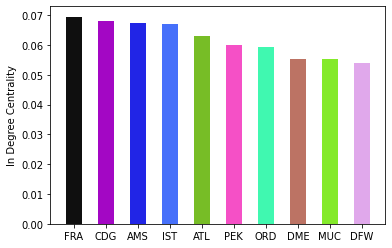

In [0]:
DC = nx.in_degree_centrality(G)
SDC = sorted(DC.items(), key=lambda x: x[1], reverse = True)    
SDC = dict(SDC[:10])
print(SDC)
colors = ['#0f0f0f','#a307c4','#2125e6','#4670fa','#77bd26','#f550c6','#40f8b0','#bc7364','#84ea2a','#e0a8eb']
plt.bar(SDC.keys(), SDC.values(), width =.5, color=colors)
plt.ylabel("In Degree Centrality")
plt.show()

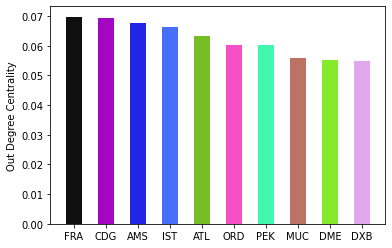

In [0]:
DC = nx.out_degree_centrality(G)
SDC = sorted(DC.items(), key=lambda x: x[1], reverse = True)    
SDC = dict(SDC[:10])
colors = ['#0f0f0f','#a307c4','#2125e6','#4670fa','#77bd26','#f550c6','#40f8b0','#bc7364','#84ea2a','#e0a8eb']
plt.bar(SDC.keys(), SDC.values(), width =.5, color=colors)
plt.ylabel("Out Degree Centrality")
plt.show()

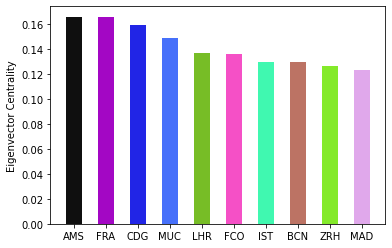

In [0]:
EC = nx.eigenvector_centrality(G)
SEC = sorted(EC.items(), key=lambda x: x[1], reverse = True)    
SEC = dict(SEC[:10])
colors = ['#0f0f0f','#a307c4','#2125e6','#4670fa','#77bd26','#f550c6','#40f8b0','#bc7364','#84ea2a','#e0a8eb']
plt.bar(SEC.keys(), SEC.values(), width =.5, color=colors)
plt.ylabel("Eigenvector Centrality")
plt.show()

[('ANC', 0.07020362618341794), ('LAX', 0.06616375813998222), ('CDG', 0.06170332586928564), ('DXB', 0.05935046022271059), ('FRA', 0.05099987732078349), ('PEK', 0.04916747207746959), ('ORD', 0.04743028669183868), ('SEA', 0.04526840982864363), ('AMS', 0.04265777892785821), ('YYZ', 0.04252693075213716)]


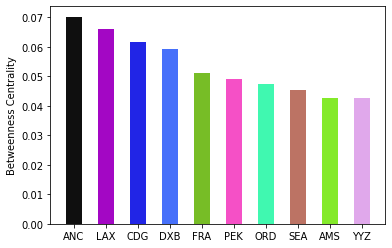

In [0]:
BC = nx.betweenness_centrality(G)
SBC = sorted(BC.items(), key=lambda x: x[1], reverse=True)[:10]    
print(SBC)
SBC = dict(SBC[:10])
colors = ['#0f0f0f','#a307c4','#2125e6','#4670fa','#77bd26','#f550c6','#40f8b0','#bc7364','#84ea2a','#e0a8eb']
plt.bar(SBC.keys(), SBC.values(), width =.5, color=colors)
plt.ylabel("Betweenness Centrality")
plt.show()

[('FRA', 0.3923891905501794), ('CDG', 0.38999292068422414), ('LHR', 0.3883056267102629), ('DXB', 0.38408393703749344), ('AMS', 0.38293239386833117), ('LAX', 0.37904231476157607), ('JFK', 0.37727672342946694), ('YYZ', 0.37241109337514505), ('IST', 0.37136990825611366), ('ORD', 0.3703758331057515)]


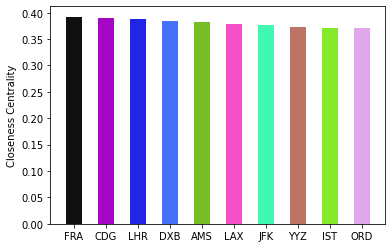

In [0]:
CC = nx.closeness_centrality(G)
SCC = sorted(CC.items(), key=lambda x: x[1], reverse=True)[:10]    
print(SCC)
SCC = dict(SCC[:10])
colors = ['#0f0f0f','#a307c4','#2125e6','#4670fa','#77bd26','#f550c6','#40f8b0','#bc7364','#84ea2a','#e0a8eb']
plt.bar(SCC.keys(), SCC.values(), width =.5, color=colors)
plt.ylabel("Closeness Centrality")
plt.show()

In [0]:
print(nx.number_strongly_connected_components(G))

NetworkXNotImplemented: ignored

In [0]:
We = nx.bridges(G0)
#print(len(list(We)))
for edges in list(We):
  G0.remove_edge(*edges)

In [0]:
print(nx.number_connected_components(G0))
print(G0.number_of_edges())
print(G0.number_of_nodes())

1
18593
3154


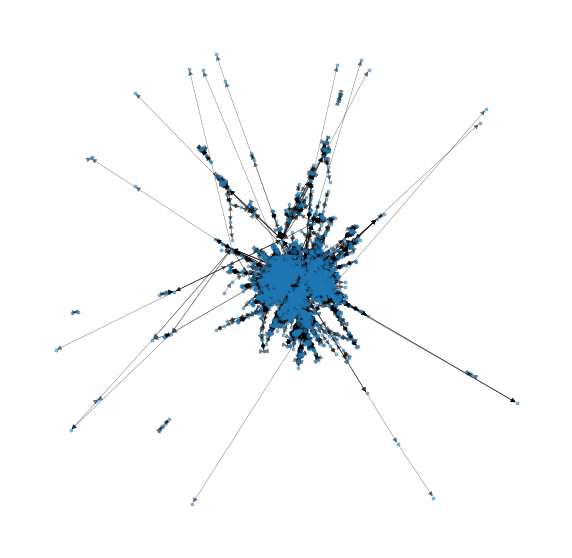

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
nx.draw_networkx(G, ax=ax, node_size=8, alpha=.5,
                 width=.5, with_labels=False)
ax.set_axis_off()

36434


In [0]:
Avg = nx.average_clustering(G)
print("Average Clustering Coefficient - " + str(Avg))
NoCC = nx.is_strongly_connected(G)
print("Number of Connected Components - " + str(NoCC))
print("Network Diameter - " + str(nx.diameter(nx.to_undirected(G))))

Average Clustering Coefficient - 0.4692087972063501
Number of Connected Components - False


NetworkXError: ignored

In [0]:
def get_SIR_infection_curve(G, infection_rate, recovery_rate, n_iter):
    
    model = ep.SIRModel(G)
    no_nodes = G.number_of_nodes()
    
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', infection_rate)
    cfg.add_model_parameter('gamma', recovery_rate)
    cfg.add_model_parameter("Infected", ['FRA','AMS'])
    model.set_initial_status(cfg)
    
    times = np.array(range(n_iter))
    
    iterations = model.iteration_bunch(n_iter)
    susceptible = np.array([iterations[i]['node_count'][0] for i in range(n_iter)])/no_nodes
    infected = np.array([iterations[i]['node_count'][1] for i in range(n_iter)])/no_nodes
    recovered = np.array([iterations[i]['node_count'][2] for i in range(n_iter)])/no_nodes
    return times, infected, recovered, susceptible

100%|██████████| 800/800 [00:08<00:00, 99.38it/s] 


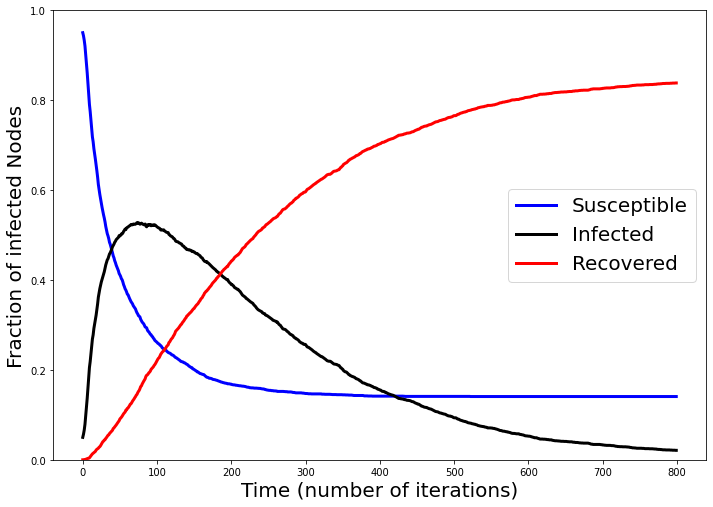

In [0]:
curve = get_SIR_infection_curve(G, 0.01,0.005, 800)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.ylim(0,1)
plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected Nodes", fontsize = 20)

ax.plot(curve[0],curve[3], label = 'Susceptible', color='blue', linewidth = 3)
ax.plot(curve[0],curve[1], label = 'Infected', color = 'black', linewidth = 3)
ax.plot(curve[0],curve[2], label = 'Recovered', color = 'red', linewidth = 3)

plt.legend(loc = 'center right', fontsize=20)

  2%|▏         | 9/500 [00:00<00:06, 81.73it/s]

0
[]


  2%|▏         | 9/500 [00:00<00:06, 80.39it/s]

34
['AMS', 'FRA', 'CDG', 'IST', 'ATL', 'PEK', 'ORD', 'MUC', 'DME', 'DXB', 'DFW', 'LHR', 'DEN', 'IAH', 'LGW', 'BCN', 'JFK', 'FCO', 'MAD', 'PVG', 'BRU', 'STN', 'EWR', 'CAN', 'LAX', 'MAN', 'DUS', 'YYZ', 'DUB', 'SVO', 'CLT', 'VIE', 'MIA', 'ZRH']


  2%|▏         | 9/500 [00:00<00:05, 82.36it/s]

171
['AMS', 'FRA', 'CDG', 'IST', 'ATL', 'PEK', 'ORD', 'MUC', 'DME', 'DXB', 'DFW', 'LHR', 'DEN', 'IAH', 'LGW', 'BCN', 'JFK', 'FCO', 'MAD', 'PVG', 'BRU', 'STN', 'EWR', 'CAN', 'LAX', 'MAN', 'DUS', 'YYZ', 'DUB', 'SVO', 'CLT', 'VIE', 'MIA', 'ZRH', 'DTW', 'HKG', 'ICN', 'LAS', 'MSP', 'PMI', 'IAD', 'SIN', 'ARN', 'PHL', 'ORY', 'BKK', 'CPH', 'DOH', 'AGP', 'LED', 'MXP', 'KUL', 'JED', 'TXL', 'CTU', 'OSL', 'SFO', 'ATH', 'NRT', 'TPE', 'LIS', 'BOS', 'MCO', 'GVA', 'SAW', 'DEL', 'FLL', 'YUL', 'ALC', 'KMG', 'MEX', 'PRG', 'SEA', 'CMN', 'CGN', 'GRU', 'SLC', 'PHX', 'DCA', 'NCE', 'AUH', 'CKG', 'EDI', 'HEL', 'HAM', 'XIY', 'SZX', 'MRS', 'TFS', 'SYD', 'BOM', 'LTN', 'LPA', 'JNB', 'CRL', 'CAI', 'CUN', 'STR', 'BHX', 'RUH', 'BGY', 'SHJ', 'TLV', 'MNL', 'LYS', 'WAW', 'BUD', 'MLA', 'YVR', 'ADD', 'MDW', 'BOG', 'VKO', 'HND', 'BRS', 'VCE', 'HGH', 'XMN', 'PTY', 'BWI', 'CSX', 'LGA', 'TPA', 'SXF', 'SHA', 'RIX', 'OTP', 'SVX', 'NBO', 'ALG', 'WUH', 'BSL', 'AYT', 'PSA', 'BLQ', 'FAO', 'CGK', 'GLA', 'EIN', 'SHE', 'HER', 'KBP', '

  2%|▏         | 9/500 [00:00<00:05, 84.77it/s]

342
['AMS', 'FRA', 'CDG', 'IST', 'ATL', 'PEK', 'ORD', 'MUC', 'DME', 'DXB', 'DFW', 'LHR', 'DEN', 'IAH', 'LGW', 'BCN', 'JFK', 'FCO', 'MAD', 'PVG', 'BRU', 'STN', 'EWR', 'CAN', 'LAX', 'MAN', 'DUS', 'YYZ', 'DUB', 'SVO', 'CLT', 'VIE', 'MIA', 'ZRH', 'DTW', 'HKG', 'ICN', 'LAS', 'MSP', 'PMI', 'IAD', 'SIN', 'ARN', 'PHL', 'ORY', 'BKK', 'CPH', 'DOH', 'AGP', 'LED', 'MXP', 'KUL', 'JED', 'TXL', 'CTU', 'OSL', 'SFO', 'ATH', 'NRT', 'TPE', 'LIS', 'BOS', 'MCO', 'GVA', 'SAW', 'DEL', 'FLL', 'YUL', 'ALC', 'KMG', 'MEX', 'PRG', 'SEA', 'CMN', 'CGN', 'GRU', 'SLC', 'PHX', 'DCA', 'NCE', 'AUH', 'CKG', 'EDI', 'HEL', 'HAM', 'XIY', 'SZX', 'MRS', 'TFS', 'SYD', 'BOM', 'LTN', 'LPA', 'JNB', 'CRL', 'CAI', 'CUN', 'STR', 'BHX', 'RUH', 'BGY', 'SHJ', 'TLV', 'MNL', 'LYS', 'WAW', 'BUD', 'MLA', 'YVR', 'ADD', 'MDW', 'BOG', 'VKO', 'HND', 'BRS', 'VCE', 'HGH', 'XMN', 'PTY', 'BWI', 'CSX', 'LGA', 'TPA', 'SXF', 'SHA', 'RIX', 'OTP', 'SVX', 'NBO', 'ALG', 'WUH', 'BSL', 'AYT', 'PSA', 'BLQ', 'FAO', 'CGK', 'GLA', 'EIN', 'SHE', 'HER', 'KBP', '

  2%|▏         | 10/500 [00:00<00:04, 99.43it/s]

685
['AMS', 'FRA', 'CDG', 'IST', 'ATL', 'PEK', 'ORD', 'MUC', 'DME', 'DXB', 'DFW', 'LHR', 'DEN', 'IAH', 'LGW', 'BCN', 'JFK', 'FCO', 'MAD', 'PVG', 'BRU', 'STN', 'EWR', 'CAN', 'LAX', 'MAN', 'DUS', 'YYZ', 'DUB', 'SVO', 'CLT', 'VIE', 'MIA', 'ZRH', 'DTW', 'HKG', 'ICN', 'LAS', 'MSP', 'PMI', 'IAD', 'SIN', 'ARN', 'PHL', 'ORY', 'BKK', 'CPH', 'DOH', 'AGP', 'LED', 'MXP', 'KUL', 'JED', 'TXL', 'CTU', 'OSL', 'SFO', 'ATH', 'NRT', 'TPE', 'LIS', 'BOS', 'MCO', 'GVA', 'SAW', 'DEL', 'FLL', 'YUL', 'ALC', 'KMG', 'MEX', 'PRG', 'SEA', 'CMN', 'CGN', 'GRU', 'SLC', 'PHX', 'DCA', 'NCE', 'AUH', 'CKG', 'EDI', 'HEL', 'HAM', 'XIY', 'SZX', 'MRS', 'TFS', 'SYD', 'BOM', 'LTN', 'LPA', 'JNB', 'CRL', 'CAI', 'CUN', 'STR', 'BHX', 'RUH', 'BGY', 'SHJ', 'TLV', 'MNL', 'LYS', 'WAW', 'BUD', 'MLA', 'YVR', 'ADD', 'MDW', 'BOG', 'VKO', 'HND', 'BRS', 'VCE', 'HGH', 'XMN', 'PTY', 'BWI', 'CSX', 'LGA', 'TPA', 'SXF', 'SHA', 'RIX', 'OTP', 'SVX', 'NBO', 'ALG', 'WUH', 'BSL', 'AYT', 'PSA', 'BLQ', 'FAO', 'CGK', 'GLA', 'EIN', 'SHE', 'HER', 'KBP', '

100%|██████████| 500/500 [00:05<00:00, 93.15it/s]


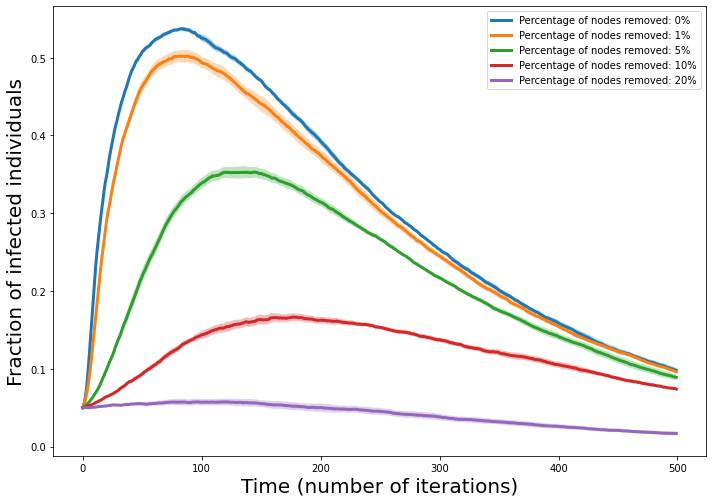

In [0]:
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

perc = [0,1,5,10,20]
no_experiments = len(perc)

DC = nx.degree_centrality(G)
SDC = sorted(DC.items(), key=lambda x: x[1], reverse = True)  

nodes = []
for i in range(len(SDC)):
  nodes.append(SDC[i][0])

for i in range(no_experiments):
    H = G.copy()
    number = round(float(perc[i])*G.number_of_nodes()/100)
    print(number)
    top_nodes = nodes[:number]
    print(top_nodes)
    for n in top_nodes:
        H.remove_edges_from([(n,out) for out in G.neighbors(n)])
    experiments = np.zeros((no_experiments,500),dtype=float)
    for ex in range(no_experiments):
        curve = get_SIR_infection_curve(H, 0.01,0.005, 500)
        experiments[ex]=curve[1]
    avg = np.mean(experiments,axis=0)
    std = np.std(experiments,axis=0)
    ax.plot(curve[0],avg, label = 'Percentage of nodes removed: '+ str(perc[i]) + "%", linewidth = 3)
    ax.fill_between(curve[0],avg-0.5*std, avg + 0.5*std, alpha = 0.3)
    
plt.legend(loc = 'upper right', fontsize=10)
plt.show()

  1%|▏         | 7/500 [00:00<00:08, 61.03it/s]

0
[]


  1%|▏         | 7/500 [00:00<00:08, 60.91it/s]

34
['ANC', 'LAX', 'CDG', 'DXB', 'FRA', 'PEK', 'ORD', 'SEA', 'AMS', 'YYZ', 'IST', 'GRU', 'LHR', 'NRT', 'SYD', 'SIN', 'BNE', 'DME', 'ATL', 'YUL', 'HKG', 'ICN', 'CPH', 'DEN', 'JFK', 'DFW', 'BOG', 'JNB', 'IAH', 'MAD', 'BKK', 'PVG', 'MIA', 'MNL']


  1%|▏         | 7/500 [00:00<00:08, 60.11it/s]

171
['ANC', 'LAX', 'CDG', 'DXB', 'FRA', 'PEK', 'ORD', 'SEA', 'AMS', 'YYZ', 'IST', 'GRU', 'LHR', 'NRT', 'SYD', 'SIN', 'BNE', 'DME', 'ATL', 'YUL', 'HKG', 'ICN', 'CPH', 'DEN', 'JFK', 'DFW', 'BOG', 'JNB', 'IAH', 'MAD', 'BKK', 'PVG', 'MIA', 'MNL', 'ARN', 'SFJ', 'YVR', 'KUL', 'BET', 'SVO', 'DOH', 'CAN', 'EWR', 'CGK', 'PPT', 'POM', 'HND', 'MUC', 'FAI', 'JED', 'HNL', 'DEL', 'SJO', 'MEX', 'AKL', 'SCL', 'LIS', 'OSL', 'AEP', 'LIM', 'MSP', 'IAD', 'YYC', 'YWG', 'LAS', 'ADD', 'FCO', 'SFO', 'JAV', 'HEL', 'GIG', 'YQT', 'YZF', 'KEF', 'ATH', 'BOS', 'ALG', 'CCS', 'BCN', 'NBO', 'BOM', 'LGW', 'VLI', 'HIR', 'ORY', 'GOH', 'YOW', 'TPE', 'BSB', 'DTW', 'KTN', 'CTU', 'FIH', 'LAD', 'AUH', 'CLT', 'VKO', 'PER', 'LED', 'BRU', 'ZRH', 'MEL', 'NAN', 'SLC', 'SGN', 'DMK', 'CNS', 'JNU', 'PAC', 'DUB', 'BZE', 'YXL', 'MAO', 'CMN', 'OME', 'OTZ', 'PTY', 'MAN', 'RGN', 'UAK', 'PHL', 'THR', 'YFB', 'AKN', 'JUV', 'YEG', 'NAS', 'DPS', 'FLL', 'UPG', 'ANI', 'RUH', 'TNR', 'GLA', 'KTM', 'DUS', 'EZE', 'YVP', 'VCP', 'LOS', 'TOS', 'JJU', '

  1%|▏         | 7/500 [00:00<00:07, 67.78it/s]

342
['ANC', 'LAX', 'CDG', 'DXB', 'FRA', 'PEK', 'ORD', 'SEA', 'AMS', 'YYZ', 'IST', 'GRU', 'LHR', 'NRT', 'SYD', 'SIN', 'BNE', 'DME', 'ATL', 'YUL', 'HKG', 'ICN', 'CPH', 'DEN', 'JFK', 'DFW', 'BOG', 'JNB', 'IAH', 'MAD', 'BKK', 'PVG', 'MIA', 'MNL', 'ARN', 'SFJ', 'YVR', 'KUL', 'BET', 'SVO', 'DOH', 'CAN', 'EWR', 'CGK', 'PPT', 'POM', 'HND', 'MUC', 'FAI', 'JED', 'HNL', 'DEL', 'SJO', 'MEX', 'AKL', 'SCL', 'LIS', 'OSL', 'AEP', 'LIM', 'MSP', 'IAD', 'YYC', 'YWG', 'LAS', 'ADD', 'FCO', 'SFO', 'JAV', 'HEL', 'GIG', 'YQT', 'YZF', 'KEF', 'ATH', 'BOS', 'ALG', 'CCS', 'BCN', 'NBO', 'BOM', 'LGW', 'VLI', 'HIR', 'ORY', 'GOH', 'YOW', 'TPE', 'BSB', 'DTW', 'KTN', 'CTU', 'FIH', 'LAD', 'AUH', 'CLT', 'VKO', 'PER', 'LED', 'BRU', 'ZRH', 'MEL', 'NAN', 'SLC', 'SGN', 'DMK', 'CNS', 'JNU', 'PAC', 'DUB', 'BZE', 'YXL', 'MAO', 'CMN', 'OME', 'OTZ', 'PTY', 'MAN', 'RGN', 'UAK', 'PHL', 'THR', 'YFB', 'AKN', 'JUV', 'YEG', 'NAS', 'DPS', 'FLL', 'UPG', 'ANI', 'RUH', 'TNR', 'GLA', 'KTM', 'DUS', 'EZE', 'YVP', 'VCP', 'LOS', 'TOS', 'JJU', '

  2%|▏         | 8/500 [00:00<00:06, 71.28it/s]

685
['ANC', 'LAX', 'CDG', 'DXB', 'FRA', 'PEK', 'ORD', 'SEA', 'AMS', 'YYZ', 'IST', 'GRU', 'LHR', 'NRT', 'SYD', 'SIN', 'BNE', 'DME', 'ATL', 'YUL', 'HKG', 'ICN', 'CPH', 'DEN', 'JFK', 'DFW', 'BOG', 'JNB', 'IAH', 'MAD', 'BKK', 'PVG', 'MIA', 'MNL', 'ARN', 'SFJ', 'YVR', 'KUL', 'BET', 'SVO', 'DOH', 'CAN', 'EWR', 'CGK', 'PPT', 'POM', 'HND', 'MUC', 'FAI', 'JED', 'HNL', 'DEL', 'SJO', 'MEX', 'AKL', 'SCL', 'LIS', 'OSL', 'AEP', 'LIM', 'MSP', 'IAD', 'YYC', 'YWG', 'LAS', 'ADD', 'FCO', 'SFO', 'JAV', 'HEL', 'GIG', 'YQT', 'YZF', 'KEF', 'ATH', 'BOS', 'ALG', 'CCS', 'BCN', 'NBO', 'BOM', 'LGW', 'VLI', 'HIR', 'ORY', 'GOH', 'YOW', 'TPE', 'BSB', 'DTW', 'KTN', 'CTU', 'FIH', 'LAD', 'AUH', 'CLT', 'VKO', 'PER', 'LED', 'BRU', 'ZRH', 'MEL', 'NAN', 'SLC', 'SGN', 'DMK', 'CNS', 'JNU', 'PAC', 'DUB', 'BZE', 'YXL', 'MAO', 'CMN', 'OME', 'OTZ', 'PTY', 'MAN', 'RGN', 'UAK', 'PHL', 'THR', 'YFB', 'AKN', 'JUV', 'YEG', 'NAS', 'DPS', 'FLL', 'UPG', 'ANI', 'RUH', 'TNR', 'GLA', 'KTM', 'DUS', 'EZE', 'YVP', 'VCP', 'LOS', 'TOS', 'JJU', '

100%|██████████| 500/500 [00:07<00:00, 66.70it/s]


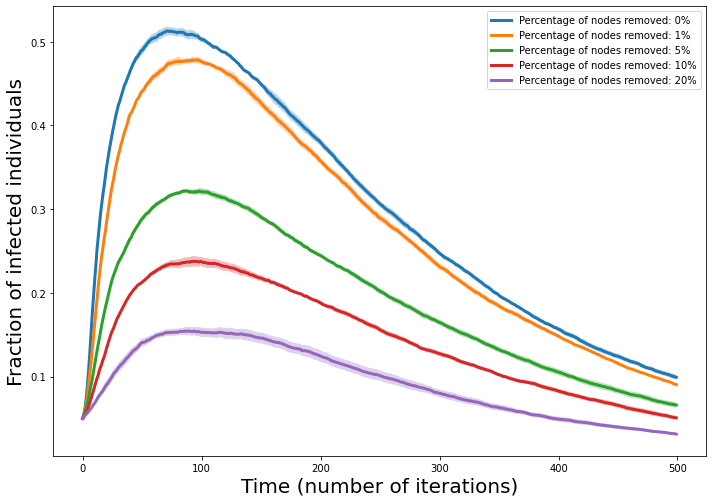

In [0]:
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

perc = [0,1,5,10,20]
no_experiments = len(perc)

#My part of the code
#highDegree = []
#for n in G.nodes():
 # highDegree.append((n, G.degree(n)))
  #print(G.degree(n) , n)
#sorts the nodes from highest degree to lowest
#highDegree.sort(key=lambda x:x[1],reverse=True)

#BC = nx.betweenness_centrality(G)
#SBC = sorted(BC.items(), key=lambda x: x[1], reverse=True) 
DC = nx.betweenness_centrality(G)
SDC = sorted(DC.items(), key=lambda x: x[1], reverse = True)  

nodes = []
for i in range(len(SDC)):
  nodes.append(SDC[i][0])

#rint(nodes)
#ranks = np.argsort([-1*G.degree(n) for n in G.nodes()])

for i in range(no_experiments):
    H = G.copy()
    number = round(float(perc[i])*G.number_of_nodes()/100)
    print(number)
    top_nodes = nodes[:number]
    print(top_nodes)
    for n in top_nodes:
        H.remove_edges_from([(n,out) for out in G.neighbors(n)])
    experiments = np.zeros((no_experiments,500),dtype=float)
    for ex in range(no_experiments):
        curve = get_SIR_infection_curve(H, 0.01,0.005, 500)
        experiments[ex]=curve[1]
    avg = np.mean(experiments,axis=0)
    std = np.std(experiments,axis=0)
    ax.plot(curve[0],avg, label = 'Percentage of nodes removed: '+ str(perc[i]) + "%", linewidth = 3)
    ax.fill_between(curve[0],avg-0.5*std, avg + 0.5*std, alpha = 0.3)
    
plt.legend(loc = 'upper right', fontsize=10)
plt.show()


  1%|          | 6/500 [00:00<00:08, 59.55it/s]

0
[]


  1%|          | 4/500 [00:00<00:12, 39.95it/s]

34
['AMS', 'FRA', 'CDG', 'MUC', 'LHR', 'FCO', 'IST', 'BCN', 'ZRH', 'MAD', 'BRU', 'DUB', 'DUS', 'LGW', 'VIE', 'MAN', 'CPH', 'JFK', 'MXP', 'DXB', 'GVA', 'TXL', 'SVO', 'ARN', 'AGP', 'EWR', 'PRG', 'ORD', 'LIS', 'YYZ', 'HAM', 'ATH', 'PMI', 'NCE']


  1%|▏         | 7/500 [00:00<00:08, 59.36it/s]

171
['AMS', 'FRA', 'CDG', 'MUC', 'LHR', 'FCO', 'IST', 'BCN', 'ZRH', 'MAD', 'BRU', 'DUB', 'DUS', 'LGW', 'VIE', 'MAN', 'CPH', 'JFK', 'MXP', 'DXB', 'GVA', 'TXL', 'SVO', 'ARN', 'AGP', 'EWR', 'PRG', 'ORD', 'LIS', 'YYZ', 'HAM', 'ATH', 'PMI', 'NCE', 'PEK', 'OSL', 'DOH', 'ATL', 'BUD', 'TLV', 'VCE', 'WAW', 'HEL', 'STN', 'EDI', 'DME', 'MLA', 'LAX', 'IAD', 'CGN', 'STR', 'TFS', 'PHL', 'LPA', 'RIX', 'ALC', 'BSL', 'BHX', 'ORY', 'SAW', 'OTP', 'LED', 'IAH', 'LYS', 'MRS', 'BLQ', 'ICN', 'NRT', 'BKK', 'YUL', 'SXF', 'DFW', 'MIA', 'CMN', 'AUH', 'BRS', 'LTN', 'HKG', 'KBP', 'CAI', 'BOS', 'PVG', 'SFO', 'NAP', 'CTA', 'HER', 'CLT', 'LUX', 'VLC', 'IBZ', 'PSA', 'DTW', 'LCA', 'TUN', 'HAJ', 'NTE', 'OPO', 'FAO', 'BEG', 'AYT', 'TLS', 'LAS', 'SIN', 'KRK', 'DEL', 'SOF', 'GLA', 'BOD', 'ACE', 'SKG', 'AMM', 'BGY', 'DBV', 'DEN', 'FUE', 'RAK', 'MSP', 'GRU', 'MCO', 'SEA', 'ALG', 'EIN', 'CUN', 'BIO', 'JED', 'VNO', 'NCL', 'RHO', 'LBA', 'CRL', 'ADB', 'SPU', 'BRE', 'PUJ', 'PMO', 'MSQ', 'VKO', 'CAN', 'FLL', 'EMA', 'GDN', 'MEX', '

  1%|▏         | 7/500 [00:00<00:07, 64.09it/s]

342
['AMS', 'FRA', 'CDG', 'MUC', 'LHR', 'FCO', 'IST', 'BCN', 'ZRH', 'MAD', 'BRU', 'DUB', 'DUS', 'LGW', 'VIE', 'MAN', 'CPH', 'JFK', 'MXP', 'DXB', 'GVA', 'TXL', 'SVO', 'ARN', 'AGP', 'EWR', 'PRG', 'ORD', 'LIS', 'YYZ', 'HAM', 'ATH', 'PMI', 'NCE', 'PEK', 'OSL', 'DOH', 'ATL', 'BUD', 'TLV', 'VCE', 'WAW', 'HEL', 'STN', 'EDI', 'DME', 'MLA', 'LAX', 'IAD', 'CGN', 'STR', 'TFS', 'PHL', 'LPA', 'RIX', 'ALC', 'BSL', 'BHX', 'ORY', 'SAW', 'OTP', 'LED', 'IAH', 'LYS', 'MRS', 'BLQ', 'ICN', 'NRT', 'BKK', 'YUL', 'SXF', 'DFW', 'MIA', 'CMN', 'AUH', 'BRS', 'LTN', 'HKG', 'KBP', 'CAI', 'BOS', 'PVG', 'SFO', 'NAP', 'CTA', 'HER', 'CLT', 'LUX', 'VLC', 'IBZ', 'PSA', 'DTW', 'LCA', 'TUN', 'HAJ', 'NTE', 'OPO', 'FAO', 'BEG', 'AYT', 'TLS', 'LAS', 'SIN', 'KRK', 'DEL', 'SOF', 'GLA', 'BOD', 'ACE', 'SKG', 'AMM', 'BGY', 'DBV', 'DEN', 'FUE', 'RAK', 'MSP', 'GRU', 'MCO', 'SEA', 'ALG', 'EIN', 'CUN', 'BIO', 'JED', 'VNO', 'NCL', 'RHO', 'LBA', 'CRL', 'ADB', 'SPU', 'BRE', 'PUJ', 'PMO', 'MSQ', 'VKO', 'CAN', 'FLL', 'EMA', 'GDN', 'MEX', '

  1%|▏         | 7/500 [00:00<00:08, 60.63it/s]

685
['AMS', 'FRA', 'CDG', 'MUC', 'LHR', 'FCO', 'IST', 'BCN', 'ZRH', 'MAD', 'BRU', 'DUB', 'DUS', 'LGW', 'VIE', 'MAN', 'CPH', 'JFK', 'MXP', 'DXB', 'GVA', 'TXL', 'SVO', 'ARN', 'AGP', 'EWR', 'PRG', 'ORD', 'LIS', 'YYZ', 'HAM', 'ATH', 'PMI', 'NCE', 'PEK', 'OSL', 'DOH', 'ATL', 'BUD', 'TLV', 'VCE', 'WAW', 'HEL', 'STN', 'EDI', 'DME', 'MLA', 'LAX', 'IAD', 'CGN', 'STR', 'TFS', 'PHL', 'LPA', 'RIX', 'ALC', 'BSL', 'BHX', 'ORY', 'SAW', 'OTP', 'LED', 'IAH', 'LYS', 'MRS', 'BLQ', 'ICN', 'NRT', 'BKK', 'YUL', 'SXF', 'DFW', 'MIA', 'CMN', 'AUH', 'BRS', 'LTN', 'HKG', 'KBP', 'CAI', 'BOS', 'PVG', 'SFO', 'NAP', 'CTA', 'HER', 'CLT', 'LUX', 'VLC', 'IBZ', 'PSA', 'DTW', 'LCA', 'TUN', 'HAJ', 'NTE', 'OPO', 'FAO', 'BEG', 'AYT', 'TLS', 'LAS', 'SIN', 'KRK', 'DEL', 'SOF', 'GLA', 'BOD', 'ACE', 'SKG', 'AMM', 'BGY', 'DBV', 'DEN', 'FUE', 'RAK', 'MSP', 'GRU', 'MCO', 'SEA', 'ALG', 'EIN', 'CUN', 'BIO', 'JED', 'VNO', 'NCL', 'RHO', 'LBA', 'CRL', 'ADB', 'SPU', 'BRE', 'PUJ', 'PMO', 'MSQ', 'VKO', 'CAN', 'FLL', 'EMA', 'GDN', 'MEX', '

100%|██████████| 500/500 [00:07<00:00, 62.82it/s]


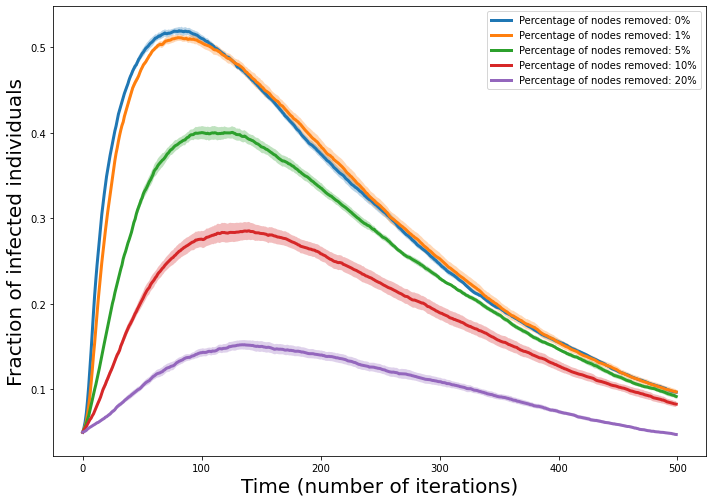

In [0]:
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

perc = [0,1,5,10,20]
no_experiments = len(perc)

#My part of the code
#highDegree = []
#for n in G.nodes():
 # highDegree.append((n, G.degree(n)))
  #print(G.degree(n) , n)
#sorts the nodes from highest degree to lowest
#highDegree.sort(key=lambda x:x[1],reverse=True)

#BC = nx.betweenness_centrality(G)
#SBC = sorted(BC.items(), key=lambda x: x[1], reverse=True) 
DC = nx.eigenvector_centrality(G)
SDC = sorted(DC.items(), key=lambda x: x[1], reverse = True)  

nodes = []
for i in range(len(SDC)):
  nodes.append(SDC[i][0])

#rint(nodes)
#ranks = np.argsort([-1*G.degree(n) for n in G.nodes()])

for i in range(no_experiments):
    H = G.copy()
    number = round(float(perc[i])*G.number_of_nodes()/100)
    print(number)
    top_nodes = nodes[:number]
    print(top_nodes)
    for n in top_nodes:
        H.remove_edges_from([(n,out) for out in G.neighbors(n)])
    experiments = np.zeros((no_experiments,500),dtype=float)
    for ex in range(no_experiments):
        curve = get_SIR_infection_curve(H, 0.01,0.005, 500)
        experiments[ex]=curve[1]
    avg = np.mean(experiments,axis=0)
    std = np.std(experiments,axis=0)
    ax.plot(curve[0],avg, label = 'Percentage of nodes removed: '+ str(perc[i]) + "%", linewidth = 3)
    ax.fill_between(curve[0],avg-0.5*std, avg + 0.5*std, alpha = 0.3)
    
plt.legend(loc = 'upper right', fontsize=10)
plt.show()


  1%|▏         | 7/500 [00:00<00:08, 60.50it/s]

0
[]


  1%|▏         | 7/500 [00:00<00:08, 61.26it/s]

34
['FRA', 'CDG', 'LHR', 'DXB', 'AMS', 'LAX', 'JFK', 'YYZ', 'IST', 'ORD', 'MUC', 'PEK', 'FCO', 'NRT', 'DOH', 'EWR', 'ICN', 'ZRH', 'MAD', 'IAH', 'HKG', 'IAD', 'ATL', 'PVG', 'DFW', 'AUH', 'SFO', 'CPH', 'SEA', 'SVO', 'BRU', 'DUS', 'BKK', 'VIE']


  1%|          | 6/500 [00:00<00:08, 59.58it/s]

171
['FRA', 'CDG', 'LHR', 'DXB', 'AMS', 'LAX', 'JFK', 'YYZ', 'IST', 'ORD', 'MUC', 'PEK', 'FCO', 'NRT', 'DOH', 'EWR', 'ICN', 'ZRH', 'MAD', 'IAH', 'HKG', 'IAD', 'ATL', 'PVG', 'DFW', 'AUH', 'SFO', 'CPH', 'SEA', 'SVO', 'BRU', 'DUS', 'BKK', 'VIE', 'LGW', 'BCN', 'CAN', 'MXP', 'SIN', 'TPE', 'TLV', 'DTW', 'MIA', 'BOS', 'ARN', 'DEL', 'MAN', 'GRU', 'YVR', 'JED', 'YUL', 'LAS', 'DEN', 'PHL', 'JNB', 'MSP', 'MEX', 'HEL', 'LIS', 'CAI', 'DME', 'KUL', 'DUB', 'TXL', 'WAW', 'GVA', 'CLT', 'KIX', 'CUN', 'HND', 'MCO', 'VCE', 'VKO', 'SYD', 'HNL', 'AMM', 'ADD', 'BOM', 'PTY', 'ATH', 'YYC', 'RUH', 'CMN', 'OSL', 'MNL', 'NCE', 'LED', 'PUJ', 'PRG', 'GIG', 'LIM', 'SGN', 'BNE', 'PDX', 'PHX', 'ALG', 'HAM', 'SAN', 'KBP', 'TAS', 'FLL', 'CMB', 'SCL', 'SLC', 'IKA', 'NBO', 'MLA', 'SAW', 'MEL', 'KEF', 'ISB', 'LHE', 'TUN', 'ALA', 'KWI', 'MRU', 'CTU', 'AGP', 'LAD', 'BHX', 'GLA', 'BOG', 'LOS', 'LYS', 'HAN', 'NGO', 'ORY', 'BUD', 'OTP', 'BWI', 'EZE', 'CVG', 'YEG', 'AKL', 'PIT', 'STR', 'MCT', 'TPA', 'GYD', 'LCA', 'MLE', 'KHI', '

  1%|▏         | 7/500 [00:00<00:07, 64.01it/s]

342
['FRA', 'CDG', 'LHR', 'DXB', 'AMS', 'LAX', 'JFK', 'YYZ', 'IST', 'ORD', 'MUC', 'PEK', 'FCO', 'NRT', 'DOH', 'EWR', 'ICN', 'ZRH', 'MAD', 'IAH', 'HKG', 'IAD', 'ATL', 'PVG', 'DFW', 'AUH', 'SFO', 'CPH', 'SEA', 'SVO', 'BRU', 'DUS', 'BKK', 'VIE', 'LGW', 'BCN', 'CAN', 'MXP', 'SIN', 'TPE', 'TLV', 'DTW', 'MIA', 'BOS', 'ARN', 'DEL', 'MAN', 'GRU', 'YVR', 'JED', 'YUL', 'LAS', 'DEN', 'PHL', 'JNB', 'MSP', 'MEX', 'HEL', 'LIS', 'CAI', 'DME', 'KUL', 'DUB', 'TXL', 'WAW', 'GVA', 'CLT', 'KIX', 'CUN', 'HND', 'MCO', 'VCE', 'VKO', 'SYD', 'HNL', 'AMM', 'ADD', 'BOM', 'PTY', 'ATH', 'YYC', 'RUH', 'CMN', 'OSL', 'MNL', 'NCE', 'LED', 'PUJ', 'PRG', 'GIG', 'LIM', 'SGN', 'BNE', 'PDX', 'PHX', 'ALG', 'HAM', 'SAN', 'KBP', 'TAS', 'FLL', 'CMB', 'SCL', 'SLC', 'IKA', 'NBO', 'MLA', 'SAW', 'MEL', 'KEF', 'ISB', 'LHE', 'TUN', 'ALA', 'KWI', 'MRU', 'CTU', 'AGP', 'LAD', 'BHX', 'GLA', 'BOG', 'LOS', 'LYS', 'HAN', 'NGO', 'ORY', 'BUD', 'OTP', 'BWI', 'EZE', 'CVG', 'YEG', 'AKL', 'PIT', 'STR', 'MCT', 'TPA', 'GYD', 'LCA', 'MLE', 'KHI', '

  1%|▏         | 7/500 [00:00<00:07, 65.89it/s]

685
['FRA', 'CDG', 'LHR', 'DXB', 'AMS', 'LAX', 'JFK', 'YYZ', 'IST', 'ORD', 'MUC', 'PEK', 'FCO', 'NRT', 'DOH', 'EWR', 'ICN', 'ZRH', 'MAD', 'IAH', 'HKG', 'IAD', 'ATL', 'PVG', 'DFW', 'AUH', 'SFO', 'CPH', 'SEA', 'SVO', 'BRU', 'DUS', 'BKK', 'VIE', 'LGW', 'BCN', 'CAN', 'MXP', 'SIN', 'TPE', 'TLV', 'DTW', 'MIA', 'BOS', 'ARN', 'DEL', 'MAN', 'GRU', 'YVR', 'JED', 'YUL', 'LAS', 'DEN', 'PHL', 'JNB', 'MSP', 'MEX', 'HEL', 'LIS', 'CAI', 'DME', 'KUL', 'DUB', 'TXL', 'WAW', 'GVA', 'CLT', 'KIX', 'CUN', 'HND', 'MCO', 'VCE', 'VKO', 'SYD', 'HNL', 'AMM', 'ADD', 'BOM', 'PTY', 'ATH', 'YYC', 'RUH', 'CMN', 'OSL', 'MNL', 'NCE', 'LED', 'PUJ', 'PRG', 'GIG', 'LIM', 'SGN', 'BNE', 'PDX', 'PHX', 'ALG', 'HAM', 'SAN', 'KBP', 'TAS', 'FLL', 'CMB', 'SCL', 'SLC', 'IKA', 'NBO', 'MLA', 'SAW', 'MEL', 'KEF', 'ISB', 'LHE', 'TUN', 'ALA', 'KWI', 'MRU', 'CTU', 'AGP', 'LAD', 'BHX', 'GLA', 'BOG', 'LOS', 'LYS', 'HAN', 'NGO', 'ORY', 'BUD', 'OTP', 'BWI', 'EZE', 'CVG', 'YEG', 'AKL', 'PIT', 'STR', 'MCT', 'TPA', 'GYD', 'LCA', 'MLE', 'KHI', '

100%|██████████| 500/500 [00:08<00:00, 61.26it/s]


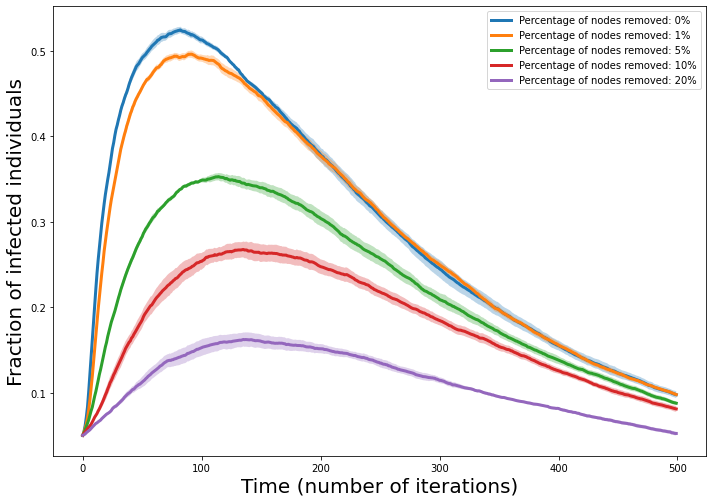

In [0]:
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

perc = [0,1,5,10,20]
no_experiments = len(perc)

#My part of the code
#highDegree = []
#for n in G.nodes():
 # highDegree.append((n, G.degree(n)))
  #print(G.degree(n) , n)
#sorts the nodes from highest degree to lowest
#highDegree.sort(key=lambda x:x[1],reverse=True)

#BC = nx.betweenness_centrality(G)
#SBC = sorted(BC.items(), key=lambda x: x[1], reverse=True) 
DC = nx.closeness_centrality(G)
SDC = sorted(DC.items(), key=lambda x: x[1], reverse = True)  

nodes = []
for i in range(len(SDC)):
  nodes.append(SDC[i][0])

#rint(nodes)
#ranks = np.argsort([-1*G.degree(n) for n in G.nodes()])

for i in range(no_experiments):
    H = G.copy()
    number = round(float(perc[i])*G.number_of_nodes()/100)
    print(number)
    top_nodes = nodes[:number]
    print(top_nodes)
    for n in top_nodes:
        H.remove_edges_from([(n,out) for out in G.neighbors(n)])
    experiments = np.zeros((no_experiments,500),dtype=float)
    for ex in range(no_experiments):
        curve = get_SIR_infection_curve(H, 0.01,0.005, 500)
        experiments[ex]=curve[1]
    avg = np.mean(experiments,axis=0)
    std = np.std(experiments,axis=0)
    ax.plot(curve[0],avg, label = 'Percentage of nodes removed: '+ str(perc[i]) + "%", linewidth = 3)
    ax.fill_between(curve[0],avg-0.5*std, avg + 0.5*std, alpha = 0.3)
    
plt.legend(loc = 'upper right', fontsize=10)
plt.show()


In [0]:
ranks = np.argsort([-1*G.degree(n) for n in G.nodes()])

highDegree = []
for n in G.nodes():
  highDegree.append((n, G.degree(n)))
  #print(G.degree(n) , n)

highDegree.sort(key=lambda x:x[1],reverse=True)
print(highDegree)
for n in highDegree:
  print(n[0])

In [0]:
[n for n in G.neighbors("AER")]

for out in G.neighbors("FRA"):
  #G.remove_edge("FRA", out)
  print(out)


In [0]:
print(G.number_of_edges())
BC = nx.betweenness_centrality(G)
SBC = sorted(BC.items(), key=lambda x: x[1], reverse=True) 
print(SBC)

36434
[('CDG', 0.06456635379261061), ('DXB', 0.06278260477337809), ('LAX', 0.06187964614230596), ('ANC', 0.05485088263949188), ('FRA', 0.05299894278433245), ('PEK', 0.04718172865059856), ('ORD', 0.04547168938495018), ('YYZ', 0.04515975730682585), ('AMS', 0.04478640161536101), ('IST', 0.042395876005804425), ('GRU', 0.04099640895478994), ('LHR', 0.039295017908284484), ('NRT', 0.035579447016052604), ('SYD', 0.035400056569755395), ('SEA', 0.03184051652210662), ('SIN', 0.031658465671965313), ('BNE', 0.03142055767731893), ('ATL', 0.03075374917480351), ('DME', 0.029929487964318248), ('HKG', 0.029337711894362625), ('YUL', 0.02849915651471464), ('ICN', 0.027663502418268204), ('DFW', 0.026614650955792577), ('JFK', 0.026256955504523297), ('DEN', 0.025660005972308806), ('BOG', 0.024662261618577777), ('BKK', 0.024080734051035304), ('JNB', 0.02400099155685598), ('MAD', 0.02281787017474571), ('IAH', 0.02268099045308112), ('PVG', 0.02160472505888254), ('MIA', 0.021010982031231938), ('MNL', 0.020520932

In [0]:
We = nx.bridges(G)
bridges = list(We)
print(bridges)
NumOfBridges = len(bridges)
print(NumOfBridges)

[('DME', 'TGK'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'PES'), ('DME', 'PEZ'), ('DME', 'KVK'), ('DME', 'OSW'), ('DME', 'OGZ'), ('DME', 'RGK'), ('DME', 'GBB'), ('DME', 'LWN'), ('LED', 'IAR'), ('SVX', 'KGP'), ('IKT', 'KCK'), ('IKT', 'ODO'), ('IKT', 'UKX'), ('IKT', 'KYZ'), ('YKS', 'CKH'), ('YKS', 'CYX'), ('YKS', 'IKS'), ('YKS', 'MQJ'), ('YKS', 'SUK'), ('AYP', 'LIM'), ('LIM', 'HUU'), ('LIM', 'CIX'), ('LIM', 'CJA'), ('LIM', 'PIU'), ('LIM', 'TBP'), ('LIM', 'TRU'), ('LIM', 'ANS'), ('LIM', 'ATA'), ('LIM', 'JAU'), ('LIM', 'TGI'), ('ACC', 'KMS'), ('ACC', 'TML'), ('ACC', 'NYI'), ('ACC', 'TKD'), ('BOG', 'AUC'), ('BOG', 'BUN'), ('BOG', 'CZU'), ('BOG', 'FLA'), ('BOG', 'IPI'), ('BOG', 'SJE'), ('BOG', 'VGZ'), ('BOG', 'EJA'), ('BOG', 'EYP'), ('BOG', 'MZL'), ('BOG', 'NVA'), ('BOG', 'PPN'), ('BOG', 'RCH'), ('BOG', 'VUP'), ('GYE', 'SCY'), ('GYE', 'GPS'), ('UIO', 'ETR'), ('UIO', 'LGQ'), ('UIO', 'MEC'), ('UIO', 'TUA'), ('CLO', 'GPI'), ('CLO', 'TCO'), ('AJR', 'LYC'), ('LYC', 'ARN'), ('ARN', 'OER'), ('ARN',

  2%|▏         | 8/500 [00:00<00:06, 76.49it/s]

0
[]


  2%|▏         | 8/500 [00:00<00:06, 78.61it/s]

163
[('DME', 'TGK'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'PES'), ('DME', 'PEZ'), ('DME', 'KVK'), ('DME', 'OSW'), ('DME', 'OGZ'), ('DME', 'RGK'), ('DME', 'GBB'), ('DME', 'LWN'), ('LED', 'IAR'), ('SVX', 'KGP'), ('IKT', 'KCK'), ('IKT', 'ODO'), ('IKT', 'UKX'), ('IKT', 'KYZ'), ('YKS', 'CKH'), ('YKS', 'CYX'), ('YKS', 'IKS'), ('YKS', 'MQJ'), ('YKS', 'SUK'), ('AYP', 'LIM'), ('LIM', 'HUU'), ('LIM', 'CIX'), ('LIM', 'CJA'), ('LIM', 'PIU'), ('LIM', 'TBP'), ('LIM', 'TRU'), ('LIM', 'ANS'), ('LIM', 'ATA'), ('LIM', 'JAU'), ('LIM', 'TGI'), ('ACC', 'KMS'), ('ACC', 'TML'), ('ACC', 'NYI'), ('ACC', 'TKD'), ('BOG', 'AUC'), ('BOG', 'BUN'), ('BOG', 'CZU'), ('BOG', 'FLA'), ('BOG', 'IPI'), ('BOG', 'SJE'), ('BOG', 'VGZ'), ('BOG', 'EJA'), ('BOG', 'EYP'), ('BOG', 'MZL'), ('BOG', 'NVA'), ('BOG', 'PPN'), ('BOG', 'RCH'), ('BOG', 'VUP'), ('GYE', 'SCY'), ('GYE', 'GPS'), ('UIO', 'ETR'), ('UIO', 'LGQ'), ('UIO', 'MEC'), ('UIO', 'TUA'), ('CLO', 'GPI'), ('CLO', 'TCO'), ('AJR', 'LYC'), ('LYC', 'ARN'), ('ARN', 'OER'), ('A

  2%|▏         | 8/500 [00:00<00:06, 74.71it/s]

327
[('DME', 'TGK'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'PES'), ('DME', 'PEZ'), ('DME', 'KVK'), ('DME', 'OSW'), ('DME', 'OGZ'), ('DME', 'RGK'), ('DME', 'GBB'), ('DME', 'LWN'), ('LED', 'IAR'), ('SVX', 'KGP'), ('IKT', 'KCK'), ('IKT', 'ODO'), ('IKT', 'UKX'), ('IKT', 'KYZ'), ('YKS', 'CKH'), ('YKS', 'CYX'), ('YKS', 'IKS'), ('YKS', 'MQJ'), ('YKS', 'SUK'), ('AYP', 'LIM'), ('LIM', 'HUU'), ('LIM', 'CIX'), ('LIM', 'CJA'), ('LIM', 'PIU'), ('LIM', 'TBP'), ('LIM', 'TRU'), ('LIM', 'ANS'), ('LIM', 'ATA'), ('LIM', 'JAU'), ('LIM', 'TGI'), ('ACC', 'KMS'), ('ACC', 'TML'), ('ACC', 'NYI'), ('ACC', 'TKD'), ('BOG', 'AUC'), ('BOG', 'BUN'), ('BOG', 'CZU'), ('BOG', 'FLA'), ('BOG', 'IPI'), ('BOG', 'SJE'), ('BOG', 'VGZ'), ('BOG', 'EJA'), ('BOG', 'EYP'), ('BOG', 'MZL'), ('BOG', 'NVA'), ('BOG', 'PPN'), ('BOG', 'RCH'), ('BOG', 'VUP'), ('GYE', 'SCY'), ('GYE', 'GPS'), ('UIO', 'ETR'), ('UIO', 'LGQ'), ('UIO', 'MEC'), ('UIO', 'TUA'), ('CLO', 'GPI'), ('CLO', 'TCO'), ('AJR', 'LYC'), ('LYC', 'ARN'), ('ARN', 'OER'), ('A

  2%|▏         | 8/500 [00:00<00:06, 76.32it/s]

490
[('DME', 'TGK'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'PES'), ('DME', 'PEZ'), ('DME', 'KVK'), ('DME', 'OSW'), ('DME', 'OGZ'), ('DME', 'RGK'), ('DME', 'GBB'), ('DME', 'LWN'), ('LED', 'IAR'), ('SVX', 'KGP'), ('IKT', 'KCK'), ('IKT', 'ODO'), ('IKT', 'UKX'), ('IKT', 'KYZ'), ('YKS', 'CKH'), ('YKS', 'CYX'), ('YKS', 'IKS'), ('YKS', 'MQJ'), ('YKS', 'SUK'), ('AYP', 'LIM'), ('LIM', 'HUU'), ('LIM', 'CIX'), ('LIM', 'CJA'), ('LIM', 'PIU'), ('LIM', 'TBP'), ('LIM', 'TRU'), ('LIM', 'ANS'), ('LIM', 'ATA'), ('LIM', 'JAU'), ('LIM', 'TGI'), ('ACC', 'KMS'), ('ACC', 'TML'), ('ACC', 'NYI'), ('ACC', 'TKD'), ('BOG', 'AUC'), ('BOG', 'BUN'), ('BOG', 'CZU'), ('BOG', 'FLA'), ('BOG', 'IPI'), ('BOG', 'SJE'), ('BOG', 'VGZ'), ('BOG', 'EJA'), ('BOG', 'EYP'), ('BOG', 'MZL'), ('BOG', 'NVA'), ('BOG', 'PPN'), ('BOG', 'RCH'), ('BOG', 'VUP'), ('GYE', 'SCY'), ('GYE', 'GPS'), ('UIO', 'ETR'), ('UIO', 'LGQ'), ('UIO', 'MEC'), ('UIO', 'TUA'), ('CLO', 'GPI'), ('CLO', 'TCO'), ('AJR', 'LYC'), ('LYC', 'ARN'), ('ARN', 'OER'), ('A

  2%|▏         | 8/500 [00:00<00:06, 73.11it/s]

654
[('DME', 'TGK'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'PES'), ('DME', 'PEZ'), ('DME', 'KVK'), ('DME', 'OSW'), ('DME', 'OGZ'), ('DME', 'RGK'), ('DME', 'GBB'), ('DME', 'LWN'), ('LED', 'IAR'), ('SVX', 'KGP'), ('IKT', 'KCK'), ('IKT', 'ODO'), ('IKT', 'UKX'), ('IKT', 'KYZ'), ('YKS', 'CKH'), ('YKS', 'CYX'), ('YKS', 'IKS'), ('YKS', 'MQJ'), ('YKS', 'SUK'), ('AYP', 'LIM'), ('LIM', 'HUU'), ('LIM', 'CIX'), ('LIM', 'CJA'), ('LIM', 'PIU'), ('LIM', 'TBP'), ('LIM', 'TRU'), ('LIM', 'ANS'), ('LIM', 'ATA'), ('LIM', 'JAU'), ('LIM', 'TGI'), ('ACC', 'KMS'), ('ACC', 'TML'), ('ACC', 'NYI'), ('ACC', 'TKD'), ('BOG', 'AUC'), ('BOG', 'BUN'), ('BOG', 'CZU'), ('BOG', 'FLA'), ('BOG', 'IPI'), ('BOG', 'SJE'), ('BOG', 'VGZ'), ('BOG', 'EJA'), ('BOG', 'EYP'), ('BOG', 'MZL'), ('BOG', 'NVA'), ('BOG', 'PPN'), ('BOG', 'RCH'), ('BOG', 'VUP'), ('GYE', 'SCY'), ('GYE', 'GPS'), ('UIO', 'ETR'), ('UIO', 'LGQ'), ('UIO', 'MEC'), ('UIO', 'TUA'), ('CLO', 'GPI'), ('CLO', 'TCO'), ('AJR', 'LYC'), ('LYC', 'ARN'), ('ARN', 'OER'), ('A

  2%|▏         | 8/500 [00:00<00:06, 75.57it/s]

817
[('DME', 'TGK'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'PES'), ('DME', 'PEZ'), ('DME', 'KVK'), ('DME', 'OSW'), ('DME', 'OGZ'), ('DME', 'RGK'), ('DME', 'GBB'), ('DME', 'LWN'), ('LED', 'IAR'), ('SVX', 'KGP'), ('IKT', 'KCK'), ('IKT', 'ODO'), ('IKT', 'UKX'), ('IKT', 'KYZ'), ('YKS', 'CKH'), ('YKS', 'CYX'), ('YKS', 'IKS'), ('YKS', 'MQJ'), ('YKS', 'SUK'), ('AYP', 'LIM'), ('LIM', 'HUU'), ('LIM', 'CIX'), ('LIM', 'CJA'), ('LIM', 'PIU'), ('LIM', 'TBP'), ('LIM', 'TRU'), ('LIM', 'ANS'), ('LIM', 'ATA'), ('LIM', 'JAU'), ('LIM', 'TGI'), ('ACC', 'KMS'), ('ACC', 'TML'), ('ACC', 'NYI'), ('ACC', 'TKD'), ('BOG', 'AUC'), ('BOG', 'BUN'), ('BOG', 'CZU'), ('BOG', 'FLA'), ('BOG', 'IPI'), ('BOG', 'SJE'), ('BOG', 'VGZ'), ('BOG', 'EJA'), ('BOG', 'EYP'), ('BOG', 'MZL'), ('BOG', 'NVA'), ('BOG', 'PPN'), ('BOG', 'RCH'), ('BOG', 'VUP'), ('GYE', 'SCY'), ('GYE', 'GPS'), ('UIO', 'ETR'), ('UIO', 'LGQ'), ('UIO', 'MEC'), ('UIO', 'TUA'), ('CLO', 'GPI'), ('CLO', 'TCO'), ('AJR', 'LYC'), ('LYC', 'ARN'), ('ARN', 'OER'), ('A

100%|██████████| 500/500 [00:05<00:00, 93.28it/s]


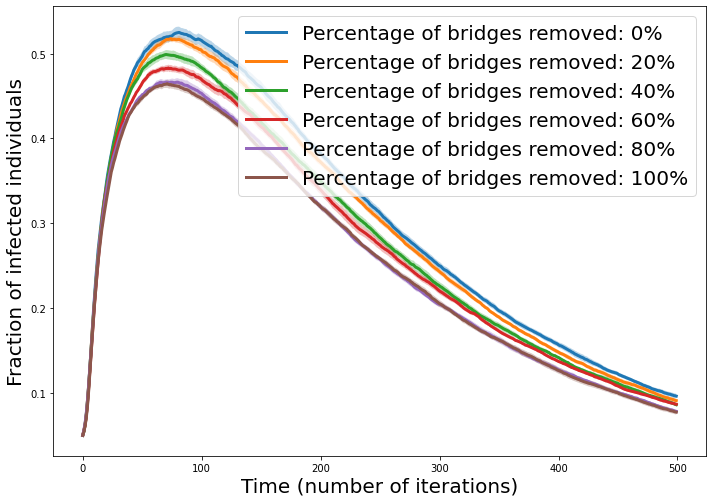

In [0]:
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel("Time (number of iterations)", fontsize = 20)
plt.ylabel("Fraction of infected individuals", fontsize = 20)

perc = [0,20,40,60,80,100]
no_experiments = 6


for i in range(no_experiments):
    H = G.copy()
    number = round(float(perc[i])*NumOfBridges/100)
    print(number)
    bridgeRemoval = bridges[:number]
    print(bridgeRemoval)
    for n in bridgeRemoval:
        H.remove_edge(*n)
    experiments = np.zeros((no_experiments,500),dtype=float)
    for ex in range(no_experiments):
        curve = get_SIR_infection_curve(H, 0.01,0.005, 500)
        experiments[ex]=curve[1]
    avg = np.mean(experiments,axis=0)
    std = np.std(experiments,axis=0)
    ax.plot(curve[0],avg, label = 'Percentage of bridges removed: '+ str(perc[i]) + "%", linewidth = 3)
    ax.fill_between(curve[0],avg-0.5*std, avg + 0.5*std, alpha = 0.3)
    
plt.legend(loc = 'upper right', fontsize=20)
plt.show()


In [0]:
highDegree = nx.degree_centrality(G)
highDegree = sorted(highDegree.items(), key=operator.itemgetter(1), reverse=True)

perc = [10,25,50,75,100]
no_experiments = 5
#print(list(G.nodes))
print(" ")

for i in range(5):
    H = G.copy()
    number_of_nodes_remove = round(float(perc[i])*G.number_of_nodes()/100)
    
    for j in range(number_of_nodes_remove):
      #print(highDegree[j][0])
      H.remove_node(highDegree[j][0])
    
    print(perc[i],"% done")
    print(H.number_of_nodes(),"nodes")
    print("Number of connected components: ",nx.number_connected_components(H))
    print("Percentage of connected components: ",(nx.number_connected_components(H)/H.number_of_nodes())*100,"%")
    print(" ")
   
     

In [0]:
#My part of the code
highDegree = []
for n in G0.nodes():
  highDegree.append((n, G0.degree(n)))
  #print(G.degree(n) , n)
#sorts the nodes from highest degree to lowest
highDegree.sort(key=lambda x:x[1],reverse=True)
print(nx.number_connected_components(G0))

perc = [0,10,20,30,40,50,60,70,80,90,100]
no_experiments = len(perc)
print(" ")

for i in range(no_experiments):
    H = G0.copy()
    num = round(float(perc[i])*len(highDegree)/100)
    nodeRemoval = highDegree[:num]
    for j in range(len(nodeRemoval)):      
      H.remove_node(highDegree[j][0])
    
    print(perc[i],"% done")
    print(H.number_of_nodes(),"nodes")
    print("Number of connected components: ",nx.number_connected_components(H))
    print(nx.number_connected_components(H),"components /", H.number_of_nodes(),"total nodes")    
    print(" ")

1
 
0 % done
3397 nodes
Number of connected components:  1
1 components / 3397 total nodes
 
10 % done
3057 nodes
Number of connected components:  1048
1048 components / 3057 total nodes
 
20 % done
2718 nodes
Number of connected components:  1625
1625 components / 2718 total nodes
 
30 % done
2378 nodes
Number of connected components:  1671
1671 components / 2378 total nodes
 
40 % done
2038 nodes
Number of connected components:  1611
1611 components / 2038 total nodes
 
50 % done
1699 nodes
Number of connected components:  1437
1437 components / 1699 total nodes
 
60 % done
1359 nodes
Number of connected components:  1245
1245 components / 1359 total nodes
 
70 % done
1019 nodes
Number of connected components:  966
966 components / 1019 total nodes
 
80 % done
679 nodes
Number of connected components:  679
679 components / 679 total nodes
 
90 % done
340 nodes
Number of connected components:  340
340 components / 340 total nodes
 
100 % done
0 nodes
Number of connected components:  0

In [0]:
#My part of the code
highDegree = []
for n in ranG1.nodes():
  highDegree.append((n, ranG1.degree(n)))
  #print(G.degree(n) , n)
#sorts the nodes from highest degree to lowest
highDegree.sort(key=lambda x:x[1],reverse=True)
print(nx.number_connected_components(ranG1))

perc = [0,10,20,30,40,50,60,70,80,90,100]
no_experiments = len(perc)
print(" ")

for i in range(no_experiments):
    H = ranG1.copy()
    num = round(float(perc[i])*len(highDegree)/100)
    nodeRemoval = highDegree[:num]
    for j in range(len(nodeRemoval)):      
      H.remove_node(highDegree[j][0])
    
    print(perc[i],"% removed")
    print(H.number_of_nodes(),"nodes")
    print("Number of connected components: ",nx.number_connected_components(H))
    print(nx.number_connected_components(H),"components /", H.number_of_nodes(),"total nodes")    
    print(" ")

2
 
0 % removed
3425 nodes
Number of connected components:  2
2 components / 3425 total nodes
 
10 % removed
3083 nodes
Number of connected components:  2
2 components / 3083 total nodes
 
20 % removed
2740 nodes
Number of connected components:  2
2 components / 2740 total nodes
 
30 % removed
2397 nodes
Number of connected components:  3
3 components / 2397 total nodes
 
40 % removed
2055 nodes
Number of connected components:  12
12 components / 2055 total nodes
 
50 % removed
1713 nodes
Number of connected components:  41
41 components / 1713 total nodes
 
60 % removed
1370 nodes
Number of connected components:  141
141 components / 1370 total nodes
 
70 % removed
1027 nodes
Number of connected components:  280
280 components / 1027 total nodes
 
80 % removed
685 nodes
Number of connected components:  394
394 components / 685 total nodes
 
90 % removed
343 nodes
Number of connected components:  285
285 components / 343 total nodes
 
100 % removed
0 nodes
Number of connected component

In [0]:
perc = [0,10,20,30,40,50,60,70,80,90,100]
no_experiments = len(perc)
print(" ")

for i in range(no_experiments):
    H = G.copy()
    number = round(float(perc[i])*NumOfBridges/100)
    bridgeRemoval = bridges[:number]
    for n in bridgeRemoval:
        H.remove_edge(*n)

    print(perc[i],"% done")
    print(H.number_of_nodes(),"nodes")
    print("Number of connected components: ",nx.number_connected_components(H))
    print(nx.number_connected_components(H),"components /", H.number_of_nodes(),"total nodes")    
    print(" ")

NameError: ignored

In [0]:
pageRankG = list(nx.out_degree_centrality(G).values())
print(pageRankG)

pageRankRG = list(nx.out_degree_centrality(ranG1).values())
print(pageRankRG)

[0.004964953271028037, 0.006133177570093458, 0.0020443925233644858, 0.004672897196261682, 0.0040887850467289715, 0.015186915887850466, 0.05519859813084112, 0.0020443925233644858, 0.0002920560747663551, 0.0008761682242990653, 0.002628504672897196, 0.0029205607476635513, 0.01139018691588785, 0.03212616822429906, 0.018983644859813083, 0.002628504672897196, 0.0029205607476635513, 0.0011682242990654205, 0.008177570093457943, 0.002628504672897196, 0.0002920560747663551, 0.0002920560747663551, 0.0002920560747663551, 0.0005841121495327102, 0.006717289719626168, 0.0017523364485981306, 0.0002920560747663551, 0.01664719626168224, 0.0014602803738317756, 0.0005841121495327102, 0.0002920560747663551, 0.0011682242990654205, 0.0008761682242990653, 0.0008761682242990653, 0.006133177570093458, 0.0005841121495327102, 0.004380841121495327, 0.008761682242990653, 0.004672897196261682, 0.009053738317757009, 0.005257009345794392, 0.0040887850467289715, 0.002336448598130841, 0.02161214953271028, 0.005549065420

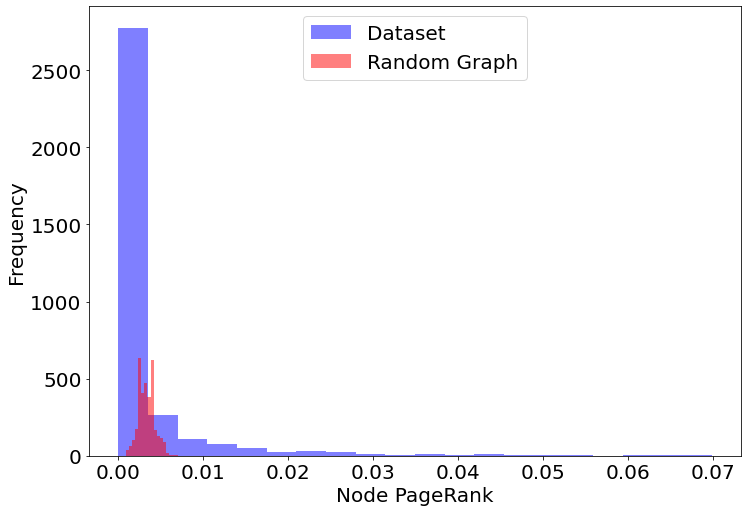

In [0]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Node PageRank',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(labelsize=20)

plt.hist(pageRankG,bins=20,label="Dataset",alpha=0.5,color='blue')
plt.hist(pageRankRG,bins=20,label='Random Graph',alpha=0.5,color='red')


plt.legend(loc='upper center',fontsize=20)

plt.show()

In [0]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Network topology

# Model selection
model = ep.ThresholdModel(G)

infected_nodes = ['OAG','SYD']
# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", infected_nodes)
#config.add_model_parameter('fraction_infected', 0.1)

# Setting node parameters
threshold = 0.75
for i in G.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)

100%|██████████| 1000/1000 [00:19<00:00, 51.21it/s]


In [0]:
print(iterations[999])

{'iteration': 999, 'status': {}, 'node_count': {0: 3418, 1: 7}, 'status_delta': {0: 0, 1: 0}}


In [0]:
DC = nx.in_degree_centrality(G)
SDC = sorted(DC.items(), key=lambda x: x[1], reverse = False)    
SDC = dict(SDC)

In [0]:
print(SDC)

{'LJA': 0.0, 'IUE': 0.0, 'STZ': 0.0, 'SXX': 0.0, 'PTJ': 0.0, 'VDA': 0.0, 'MSW': 0.0, 'TGK': 0.0002920560747663551, 'KCK': 0.0002920560747663551, 'ODO': 0.0002920560747663551, 'UKX': 0.0002920560747663551, 'AYP': 0.0002920560747663551, 'HUU': 0.0002920560747663551, 'SCY': 0.0002920560747663551, 'AJR': 0.0002920560747663551, 'OER': 0.0002920560747663551, 'HMV': 0.0002920560747663551, 'AOS': 0.0002920560747663551, 'KKB': 0.0002920560747663551, 'KLN': 0.0002920560747663551, 'KOZ': 0.0002920560747663551, 'OLH': 0.0002920560747663551, 'KZB': 0.0002920560747663551, 'SYB': 0.0002920560747663551, 'KYK': 0.0002920560747663551, 'KPR': 0.0002920560747663551, 'BSO': 0.0002920560747663551, 'CBO': 0.0002920560747663551, 'CRM': 0.0002920560747663551, 'RXS': 0.0002920560747663551, 'TUG': 0.0002920560747663551, 'JBR': 0.0002920560747663551, 'MTM': 0.0002920560747663551, 'XGR': 0.0002920560747663551, 'MEI': 0.0002920560747663551, 'MSL': 0.0002920560747663551, 'PIB': 0.0002920560747663551, 'BIM': 0.000292

In [0]:
print(SDC.get('SYD'))

0.024240654205607476


In [0]:
[n for n in G.neighbors('BOS')]

In [0]:
We = nx.bridges(G)
bridges = list(We)
print(bridges)
NumOfBridges = len(bridges)
print(NumOfBridges)

[('DME', 'TGK'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'PES'), ('DME', 'PEZ'), ('DME', 'KVK'), ('DME', 'OSW'), ('DME', 'OGZ'), ('DME', 'RGK'), ('DME', 'GBB'), ('DME', 'LWN'), ('LED', 'IAR'), ('SVX', 'KGP'), ('IKT', 'KCK'), ('IKT', 'ODO'), ('IKT', 'UKX'), ('IKT', 'KYZ'), ('YKS', 'CKH'), ('YKS', 'CYX'), ('YKS', 'IKS'), ('YKS', 'MQJ'), ('YKS', 'SUK'), ('AYP', 'LIM'), ('LIM', 'HUU'), ('LIM', 'CIX'), ('LIM', 'CJA'), ('LIM', 'PIU'), ('LIM', 'TBP'), ('LIM', 'TRU'), ('LIM', 'ANS'), ('LIM', 'ATA'), ('LIM', 'JAU'), ('LIM', 'TGI'), ('ACC', 'KMS'), ('ACC', 'TML'), ('ACC', 'NYI'), ('ACC', 'TKD'), ('BOG', 'AUC'), ('BOG', 'BUN'), ('BOG', 'CZU'), ('BOG', 'FLA'), ('BOG', 'IPI'), ('BOG', 'SJE'), ('BOG', 'VGZ'), ('BOG', 'EJA'), ('BOG', 'EYP'), ('BOG', 'MZL'), ('BOG', 'NVA'), ('BOG', 'PPN'), ('BOG', 'RCH'), ('BOG', 'VUP'), ('GYE', 'SCY'), ('GYE', 'GPS'), ('UIO', 'ETR'), ('UIO', 'LGQ'), ('UIO', 'MEC'), ('UIO', 'TUA'), ('CLO', 'GPI'), ('CLO', 'TCO'), ('AJR', 'LYC'), ('LYC', 'ARN'), ('ARN', 'OER'), ('ARN',

In [0]:
perc = [0,10,20,30,40,50,60,70,80,90,100]
no_experiments = len(perc)
print(" ")

for i in range(no_experiments):
    H = G.copy()
    number = round(float(perc[i])*NumOfBridges/100)
    bridgeRemoval = bridges[:number]
    for n in bridgeRemoval:
        H.remove_edge(*n)

    print(perc[i],"% done")
    print(H.number_of_nodes(),"nodes")
    print("Number of connected components: ",nx.number_connected_components(H))
    print(nx.number_connected_components(H),"components /", H.number_of_nodes(),"total nodes")    
    print(" ")

 
0 % done
3425 nodes
Number of connected components:  8
8 components / 3425 total nodes
 
10 % done
3425 nodes
Number of connected components:  90
90 components / 3425 total nodes
 
20 % done
3425 nodes
Number of connected components:  171
171 components / 3425 total nodes
 
30 % done
3425 nodes
Number of connected components:  253
253 components / 3425 total nodes
 
40 % done
3425 nodes
Number of connected components:  335
335 components / 3425 total nodes
 
50 % done
3425 nodes
Number of connected components:  416
416 components / 3425 total nodes
 
60 % done
3425 nodes
Number of connected components:  498
498 components / 3425 total nodes
 
70 % done
3425 nodes
Number of connected components:  580
580 components / 3425 total nodes
 
80 % done
3425 nodes
Number of connected components:  662
662 components / 3425 total nodes
 
90 % done
3425 nodes
Number of connected components:  743
743 components / 3425 total nodes
 
100 % done
3425 nodes
Number of connected components:  825
825 co